# FluType Task
In this document you find my results and documentation on the task provided here:

https://github.com/matthiaskoenig/flutype-task/blob/master/task.ipynb

## Task description
Build a very simple classification model, which allows to predict the virus type from given features P. Provide a fitted classifier and an evaluation of the performance of the classifier on trainings & test data set.

## Data sets
* training data set
```
./data/flutype_train.csv
```

* test data set
```
./data/flutype_test.csv (test data set)
```


## Packages and functions

In [52]:
import pandas as pd
from collections import Counter

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import itertools
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [53]:
def plot_confusion_matrix(cm, 
                          classes,
                          plot_title,
                          cmap=plt.cm.Reds):
    
    # This function plots the confusion matrix and is derived from
    # http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    plt.imshow(cm, interpolation='nearest', cmap=cmap) # imshow() plots numpy arrays as images
    
    plt.title(plot_title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    # write values to plot (here: absolute values)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()

## Data preparation

In [54]:
# read test data set

dtest = pd.read_csv('./data/flutype_test.csv', sep="\t")
print 'test data set: ' + str(len(dtest)) + ' samples'
dtest.head(3)

test data set: 24 samples


,virus,P1,P3,P4,P5,P6,P7,P8,P10,P13
0,X31,1569,2185,3988,3104,161,394,788,4396,443
1,X31,1840,2203,5003,2975,148,613,726,4284,486
2,X31,2039,2269,5163,3067,126,689,692,3493,372


In [55]:
# read the training data set

dtrain = pd.read_csv('./data/flutype_train.csv', sep="\t")
print 'training data set: ' + str(len(dtrain)) + ' samples'
dtrain.head(3)

training data set: 300 samples


,virus,P1,P3,P4,P5,P6,P7,P8,P10,P13
0,X31,1779.0,2285.0,4711.0,2976.0,145.0,792.0,694.0,3709.0,384.0
1,X31,1286.0,1678.0,4854.0,3133.0,141.0,402.0,738.0,4583.0,343.0
2,X31,2147.0,1688.0,4821.0,2520.0,153.0,426.0,543.0,3737.0,422.0


In [56]:
# prepare data format for classification with sklearn functions

# training data set (300 samples)
y_dtrain = dtrain.as_matrix()[:,0]  # numpy.array( [n_samples, n_classes] )
X_dtrain = dtrain.as_matrix()[:,1:] # numpy.array( [n_samples, n_features] )

# test data set (24 samples)
y_dtest = dtest.as_matrix()[:,0]  # numpy.array( [n_samples, n_classes] )
X_dtest = dtest.as_matrix()[:,1:] # numpy.array( [n_samples, n_features] )

# variable for class names
class_names=['H1', 'H5', 'H7', 'NY', 'Vi', 'X31']

# check on data
print y_dtrain
print X_dtrain

['X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31'
 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31'
 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31'
 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31' 'X31'
 'X31' 'X31' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1'
 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1'
 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1'
 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H1' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5'
 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5'
 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5'
 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H5' 'H7' 'H7'
 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7'
 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7' 'H7'
 'H7' 'H7' 'H7' 'H7' 'H7' '

## Classification model (training set)
In the following scikit-learn is used to build and test the classification model with logistic regression: 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


In [57]:
# build classifier with training data set

model = LogisticRegression() # uses default multiclass case: one-vs-rest (OvR)
model.fit(X_dtrain, y_dtrain)

# make predictions with training dataset
expected_dtrain = y_dtrain
predicted_dtrain = model.predict(X_dtrain)

# quick check
results = ['correct class' if e==p else 'wrong class' for e, p in zip(expected_dtrain, predicted_dtrain)]
Counter(results)

Counter({'correct class': 300})

I am very surprised by the correct classification of ALL samples (great!) - in fact, I am that surprised I checked several times whether my approach is incorrect but it seems fine to me.
I would have suspected a few false classifications for a training set with good data and distinguishing parameters. However, since these are probably computationally generated data sets, a completely correct classification might be realistic.
I checked also the linear SVC algorithm, sklearn.svm.LinearSVC, that assigned 295 out of 300 samples correctly. I continue with the logistic regression, since it performs even better.

## Classifying the test data set
The test data set is used on the classification model in order to test its performance.


In [58]:
# run classifier on test dataset

expected_dtest = y_dtest
predicted_dtest = model.predict(X_dtest)

# quick check
results = ['correct class' if e==p else 'wrong class' for e, p in zip(expected_dtest, predicted_dtest)]
Counter(results)

Counter({'correct class': 24})

Completely correct classification of the test data set. Well, how nice. That's probably every modeler's dream.

## Performance evaluation

The model performance is evaluated using sklearn.metrics functions (classification_report and confusion_matrix):

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

### classification_report
* precision = positive predictive value (PPV) = number of true positives / number of true positives + false positives
* recall = sensitivity = positive predictive value (PPV) = number of true positives / number of true positive + false negative
* f1-score = measure of a test's accuracy considering precision and recall (best value at 1 and worst at 0)
* support = number of occurrences of each class

### confusion_matrix
* confusion matrix = accuracy of a model with two or more classes

In [59]:
# training set
cr_dtrain = metrics.classification_report(expected_dtrain, predicted_dtrain)
cm_dtrain = metrics.confusion_matrix(expected_dtrain, predicted_dtrain, labels=class_names)

print cr_dtrain
print cm_dtrain

             precision    recall  f1-score   support

         H1       1.00      1.00      1.00        50
         H5       1.00      1.00      1.00        50
         H7       1.00      1.00      1.00        50
         NY       1.00      1.00      1.00        50
         Vi       1.00      1.00      1.00        50
        X31       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       300

[[50  0  0  0  0  0]
 [ 0 50  0  0  0  0]
 [ 0  0 50  0  0  0]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0 50  0]
 [ 0  0  0  0  0 50]]


The model/classifier classifies all samples of the training data set correctly: precision, recall and f1-score of 1, and a confusion matrix as diagonal matrix.

In [60]:
# test set
cr_dtest = metrics.classification_report(expected_dtest, predicted_dtest)
cm_dtest = metrics.confusion_matrix(expected_dtest, predicted_dtest, labels=class_names)

print cr_dtest
print cm_dtest

             precision    recall  f1-score   support

         H1       1.00      1.00      1.00         4
         H5       1.00      1.00      1.00         4
         H7       1.00      1.00      1.00         4
         NY       1.00      1.00      1.00         4
         Vi       1.00      1.00      1.00         4
        X31       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        24

[[4 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]


The test data set is classified correctly: precision, recall and f1-score of 1, and a confusion matrix as diagonal matrix.

<IPython.core.display.Javascript object>


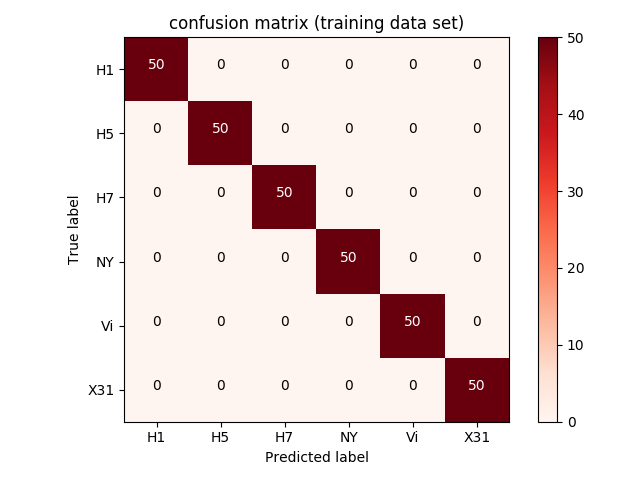

<IPython.core.display.Javascript object>


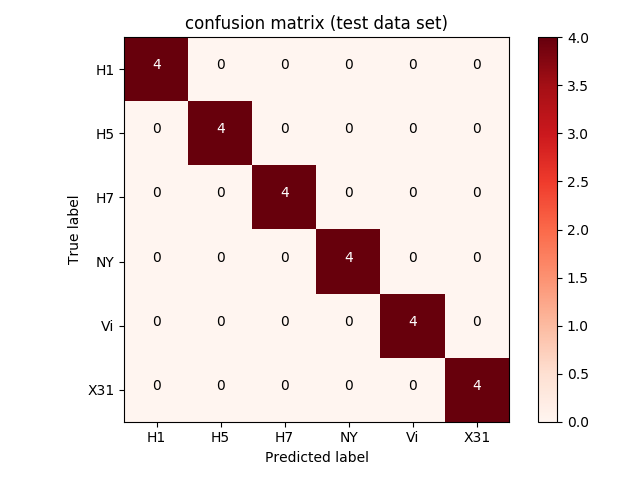

In [62]:
# plot confusion matrix

# training data set
plt.figure('confusion matrix (training data set)')
plot_confusion_matrix(cm_dtrain, classes=class_names, plot_title='confusion matrix (training data set)')

# test data set
plt.figure('confusion matrix (test data set)')
plot_confusion_matrix(cm_dtest, classes=class_names, plot_title='confusion matrix (test data set)')

## Some questions
* Why are some parameters missing (inconsistent feature numbering)? Feature selection, missing data?
* Compare multiclass classification methods and ML algorithms?

## Literature

### Logistic regression 
* https://en.wikipedia.org/wiki/Logistic_regression#Example:_Probability_of_passing_an_exam_versus_hours_of_study

### Multiclass Classification: OVA
* http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier.fit

### ML and scikit-learn
* http://kukuruku.co/hub/python/introduction-to-machine-learning-with-python-andscikit-learn
* http://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html